In [18]:
# estatísticas básicas
import seaborn as sea
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



file_name = 'measurements_benchmarks.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")
df

,Benchmark,Program,PowerLimit,Package,Core,GPU,DRAM,Time,Temperature,Memory
0,pyperformance,2to3,-1,835.252747,458.644226,0.001038,101.960938,40199,37.0,45668
1,pyperformance,2to3,-1,831.362305,453.155640,0.001099,101.655823,40165,38.0,45648
2,pyperformance,2to3,-1,843.226196,463.021912,0.001160,102.006287,40222,39.0,45632
3,pyperformance,2to3,-1,848.255676,466.052002,0.001221,102.004700,40223,40.2,45724
4,pyperformance,2to3,-1,842.879822,459.682495,0.001160,101.820251,40218,39.8,45580
...,...,...,...,...,...,...,...,...,...,...
4875,dacapo,zxing,15,314.566345,146.197876,0.000916,54.414185,21044,37.5,253528
4876,dacapo,zxing,15,299.649231,139.292236,0.000000,51.961060,20050,37.5,198620
4877,dacapo,zxing,15,312.402527,145.220398,0.000854,54.325867,20902,38.0,223336
4878,dacapo,zxing,15,315.248047,146.709717,0.000000,54.513306,21090,37.5,202120


In [19]:
# Convertendo de ms para s
df['Time'] = df['Time'] / 1000
df

,Benchmark,Program,PowerLimit,Package,Core,GPU,DRAM,Time,Temperature,Memory
0,pyperformance,2to3,-1,835.252747,458.644226,0.001038,101.960938,40.199,37.0,45668
1,pyperformance,2to3,-1,831.362305,453.155640,0.001099,101.655823,40.165,38.0,45648
2,pyperformance,2to3,-1,843.226196,463.021912,0.001160,102.006287,40.222,39.0,45632
3,pyperformance,2to3,-1,848.255676,466.052002,0.001221,102.004700,40.223,40.2,45724
4,pyperformance,2to3,-1,842.879822,459.682495,0.001160,101.820251,40.218,39.8,45580
...,...,...,...,...,...,...,...,...,...,...
4875,dacapo,zxing,15,314.566345,146.197876,0.000916,54.414185,21.044,37.5,253528
4876,dacapo,zxing,15,299.649231,139.292236,0.000000,51.961060,20.050,37.5,198620
4877,dacapo,zxing,15,312.402527,145.220398,0.000854,54.325867,20.902,38.0,223336
4878,dacapo,zxing,15,315.248047,146.709717,0.000000,54.513306,21.090,37.5,202120


### Create "Language" column with possible values 'Python', 'Java' and 'Haskell'

In [20]:
df['Language'] = df['Benchmark'].map({
    'pyperformance': 'Python',
    'dacapo': 'Java',
    'nofib': 'Haskell'
})
df

,Benchmark,Program,PowerLimit,Package,Core,GPU,DRAM,Time,Temperature,Memory,Language
0,pyperformance,2to3,-1,835.252747,458.644226,0.001038,101.960938,40.199,37.0,45668,Python
1,pyperformance,2to3,-1,831.362305,453.155640,0.001099,101.655823,40.165,38.0,45648,Python
2,pyperformance,2to3,-1,843.226196,463.021912,0.001160,102.006287,40.222,39.0,45632,Python
3,pyperformance,2to3,-1,848.255676,466.052002,0.001221,102.004700,40.223,40.2,45724,Python
4,pyperformance,2to3,-1,842.879822,459.682495,0.001160,101.820251,40.218,39.8,45580,Python
...,...,...,...,...,...,...,...,...,...,...,...
4875,dacapo,zxing,15,314.566345,146.197876,0.000916,54.414185,21.044,37.5,253528,Java
4876,dacapo,zxing,15,299.649231,139.292236,0.000000,51.961060,20.050,37.5,198620,Java
4877,dacapo,zxing,15,312.402527,145.220398,0.000854,54.325867,20.902,38.0,223336,Java
4878,dacapo,zxing,15,315.248047,146.709717,0.000000,54.513306,21.090,37.5,202120,Java


### Visualize dataframe for a certain benchmark

In [21]:
#benchmark_language = "Python"
benchmark_language = "Java"
#benchmark_language = "Haskell"

unique_df = df[df['Language'] == benchmark_language]
unique_df

,Benchmark,Program,PowerLimit,Package,Core,GPU,DRAM,Time,Temperature,Memory,Language
2040,dacapo,avrora,-1,158.997192,85.994141,0.000000,20.404297,8.184,41.2,101356,Java
2041,dacapo,avrora,-1,163.593872,84.245483,0.000000,22.584534,9.071,41.2,101620,Java
2042,dacapo,avrora,-1,163.162781,103.044373,0.000000,15.910828,6.184,42.0,121084,Java
2043,dacapo,avrora,-1,164.940796,95.861267,0.001099,18.661438,7.450,42.0,103424,Java
2044,dacapo,avrora,-1,159.071777,88.610291,0.000000,19.338318,7.742,41.8,101404,Java
...,...,...,...,...,...,...,...,...,...,...,...
4875,dacapo,zxing,15,314.566345,146.197876,0.000916,54.414185,21.044,37.5,253528,Java
4876,dacapo,zxing,15,299.649231,139.292236,0.000000,51.961060,20.050,37.5,198620,Java
4877,dacapo,zxing,15,312.402527,145.220398,0.000854,54.325867,20.902,38.0,223336,Java
4878,dacapo,zxing,15,315.248047,146.709717,0.000000,54.513306,21.090,37.5,202120,Java


In [22]:
unique_df["Program"].unique()

array([' avrora', ' batik', ' biojava', ' eclipse', ' fop', ' graphchi',
       ' h2', ' jme', ' jython', ' kafka', ' luindex', ' lusearch',
       ' pmd', ' spring', ' sunflow', ' tomcat', ' tradebeans',
       ' tradesoap', ' xalan', ' zxing'], dtype=object)

### Remove outliers

In [23]:
# Antes de remover outliers:
df.groupby(['Language', 'Program', 'PowerLimit']).size().reset_index(name='Count')

,Language,Program,PowerLimit,Count
0,Haskell,anna,-1,20
1,Haskell,anna,15,20
2,Haskell,bspt,-1,20
3,Haskell,bspt,15,20
4,Haskell,cacheprof,-1,20
...,...,...,...,...
239,Python,unpickle_list,15,20
240,Python,unpickle_pure_python,-1,20
241,Python,unpickle_pure_python,15,20
242,Python,xml_etree,-1,20


In [24]:
group_columns = ['Language', 'Program','PowerLimit']
value_column = 'Package'
n_values_to_remove = 3

# Define a function to remove the lowest and highest values within each group
def remove_extremes(group):
    sorted_group = group.sort_values(value_column)
    return sorted_group.iloc[n_values_to_remove:-n_values_to_remove]

# Apply the function within each group using groupby with multiple columns
df_without_outliers = df.groupby(group_columns, group_keys=False, sort=False).apply(remove_extremes)

In [25]:
# Depois de remover outliers:
df_without_outliers.groupby(['Language', 'Program', 'PowerLimit']).size().reset_index(name='Count')

,Language,Program,PowerLimit,Count
0,Haskell,anna,-1,14
1,Haskell,anna,15,14
2,Haskell,bspt,-1,14
3,Haskell,bspt,15,14
4,Haskell,cacheprof,-1,14
...,...,...,...,...
239,Python,unpickle_list,15,14
240,Python,unpickle_pure_python,-1,14
241,Python,unpickle_pure_python,15,14
242,Python,xml_etree,-1,14


In [26]:
df_without_outliers = df_without_outliers[['Language','Program','PowerLimit','Package','Time']]
df_without_outliers.rename(columns={'Package': 'Energy (J)'}, inplace=True)
df_without_outliers.rename(columns={'Time': 'Time (ms)'}, inplace=True)
df_without_outliers

,Language,Program,PowerLimit,Energy (J),Time (ms)
2,Python,2to3,-1,843.226196,40.222
7,Python,2to3,-1,846.495911,40.152
3,Python,2to3,-1,848.255676,40.223
16,Python,2to3,-1,850.550781,40.185
19,Python,2to3,-1,850.658813,40.186
...,...,...,...,...,...
4864,Java,zxing,15,311.415100,20.833
4877,Java,zxing,15,312.402527,20.902
4875,Java,zxing,15,314.566345,21.044
4878,Java,zxing,15,315.248047,21.090


### Calculating mean values

In [27]:
df_mean_values = df_without_outliers.groupby(['Language', 'Program', 'PowerLimit']).agg({'Energy (J)': 'mean', 'Time (ms)': 'mean'}).reset_index()
df_mean_values

,Language,Program,PowerLimit,Energy (J),Time (ms)
0,Haskell,anna,-1,151.416351,7.350143
1,Haskell,anna,15,142.024026,9.502143
2,Haskell,bspt,-1,129.296147,5.964429
3,Haskell,bspt,15,120.063402,8.032857
4,Haskell,cacheprof,-1,121.222595,5.637643
...,...,...,...,...,...
239,Python,unpickle_list,15,264.132952,17.808214
240,Python,unpickle_pure_python,-1,312.523111,14.233357
241,Python,unpickle_pure_python,15,287.609798,19.376714
242,Python,xml_etree,-1,1450.197170,66.218714


### Calculating gains from PowerLimit=-1 to PowerLimit=15

In [28]:
# Separar os dados com PowerLimit -1 e 15
df_neg1 = df_mean_values[df_mean_values['PowerLimit'] == -1].copy()
df_15 = df_mean_values[df_mean_values['PowerLimit'] == 15].copy()

# Renomear colunas para mesclar os DataFrames
df_neg1.rename(columns={'Energy (J)': 'Energy (J) -1', 'Time (ms)': 'Time (ms) -1'}, inplace=True)
df_15.rename(columns={'Energy (J)': 'Energy (J) 15', 'Time (ms)': 'Time (ms) 15'}, inplace=True)

# Juntar os DataFrames com base em Language e Program
df_merged = pd.merge(df_neg1, df_15, on=["Language", "Program"], suffixes=("", "_15"))

# Calcular os ganhos de PowerLimit -1 para PowerLimit 15
df_merged["Energy gain (J) - -1 -> 15"] = df_merged["Energy (J) 15"] - df_merged["Energy (J) -1"]
df_merged["Energy gain (%) - -1 -> 15"] = (df_merged["Energy gain (J) - -1 -> 15"] / df_merged["Energy (J) -1"]) * 100
df_merged["Time gain (s) - -1 -> 15"] = (df_merged["Time (ms) 15"] - df_merged["Time (ms) -1"]) / 1000
df_merged["Time gain (%) - -1 -> 15"] = (df_merged["Time gain (s) - -1 -> 15"] / (df_merged["Time (ms) -1"] / 1000)) * 100

# Selecionar as colunas finais
final_df = df_merged[[
    "Program", "Language",
    "Energy gain (J) - -1 -> 15", "Energy gain (%) - -1 -> 15",
    "Time gain (s) - -1 -> 15", "Time gain (%) - -1 -> 15"
]]

final_df = final_df.rename(columns={
    'Energy gain (J) - -1 -> 15': 'Energy gain (J)',
    'Energy gain (%) - -1 -> 15': 'Energy gain (%)',
    'Time gain (s) - -1 -> 15': 'Time gain (s)',
    'Time gain (%) - -1 -> 15': 'Time gain (%)'
})

final_df

,Program,Language,Energy gain (J),Energy gain (%),Time gain (s),Time gain (%)
0,anna,Haskell,-9.392325,-6.202980,0.002152,29.278343
1,bspt,Haskell,-9.232744,-7.140773,0.002068,34.679409
2,cacheprof,Haskell,-10.678523,-8.809021,0.001759,31.197182
3,compress,Haskell,-7.298161,-7.298336,0.001590,34.460119
4,compress2,Haskell,-7.779118,-7.279182,0.001677,33.863060
...,...,...,...,...,...,...
117,unpack_sequence,Python,-21.193604,-7.062473,0.004707,33.413780
118,unpickle,Python,-171.925903,-44.493968,-0.003441,-19.194741
119,unpickle_list,Python,-20.273943,-7.128499,0.004663,35.470777
120,unpickle_pure_python,Python,-24.913313,-7.971671,0.005143,36.135938


### Plots

#### Python

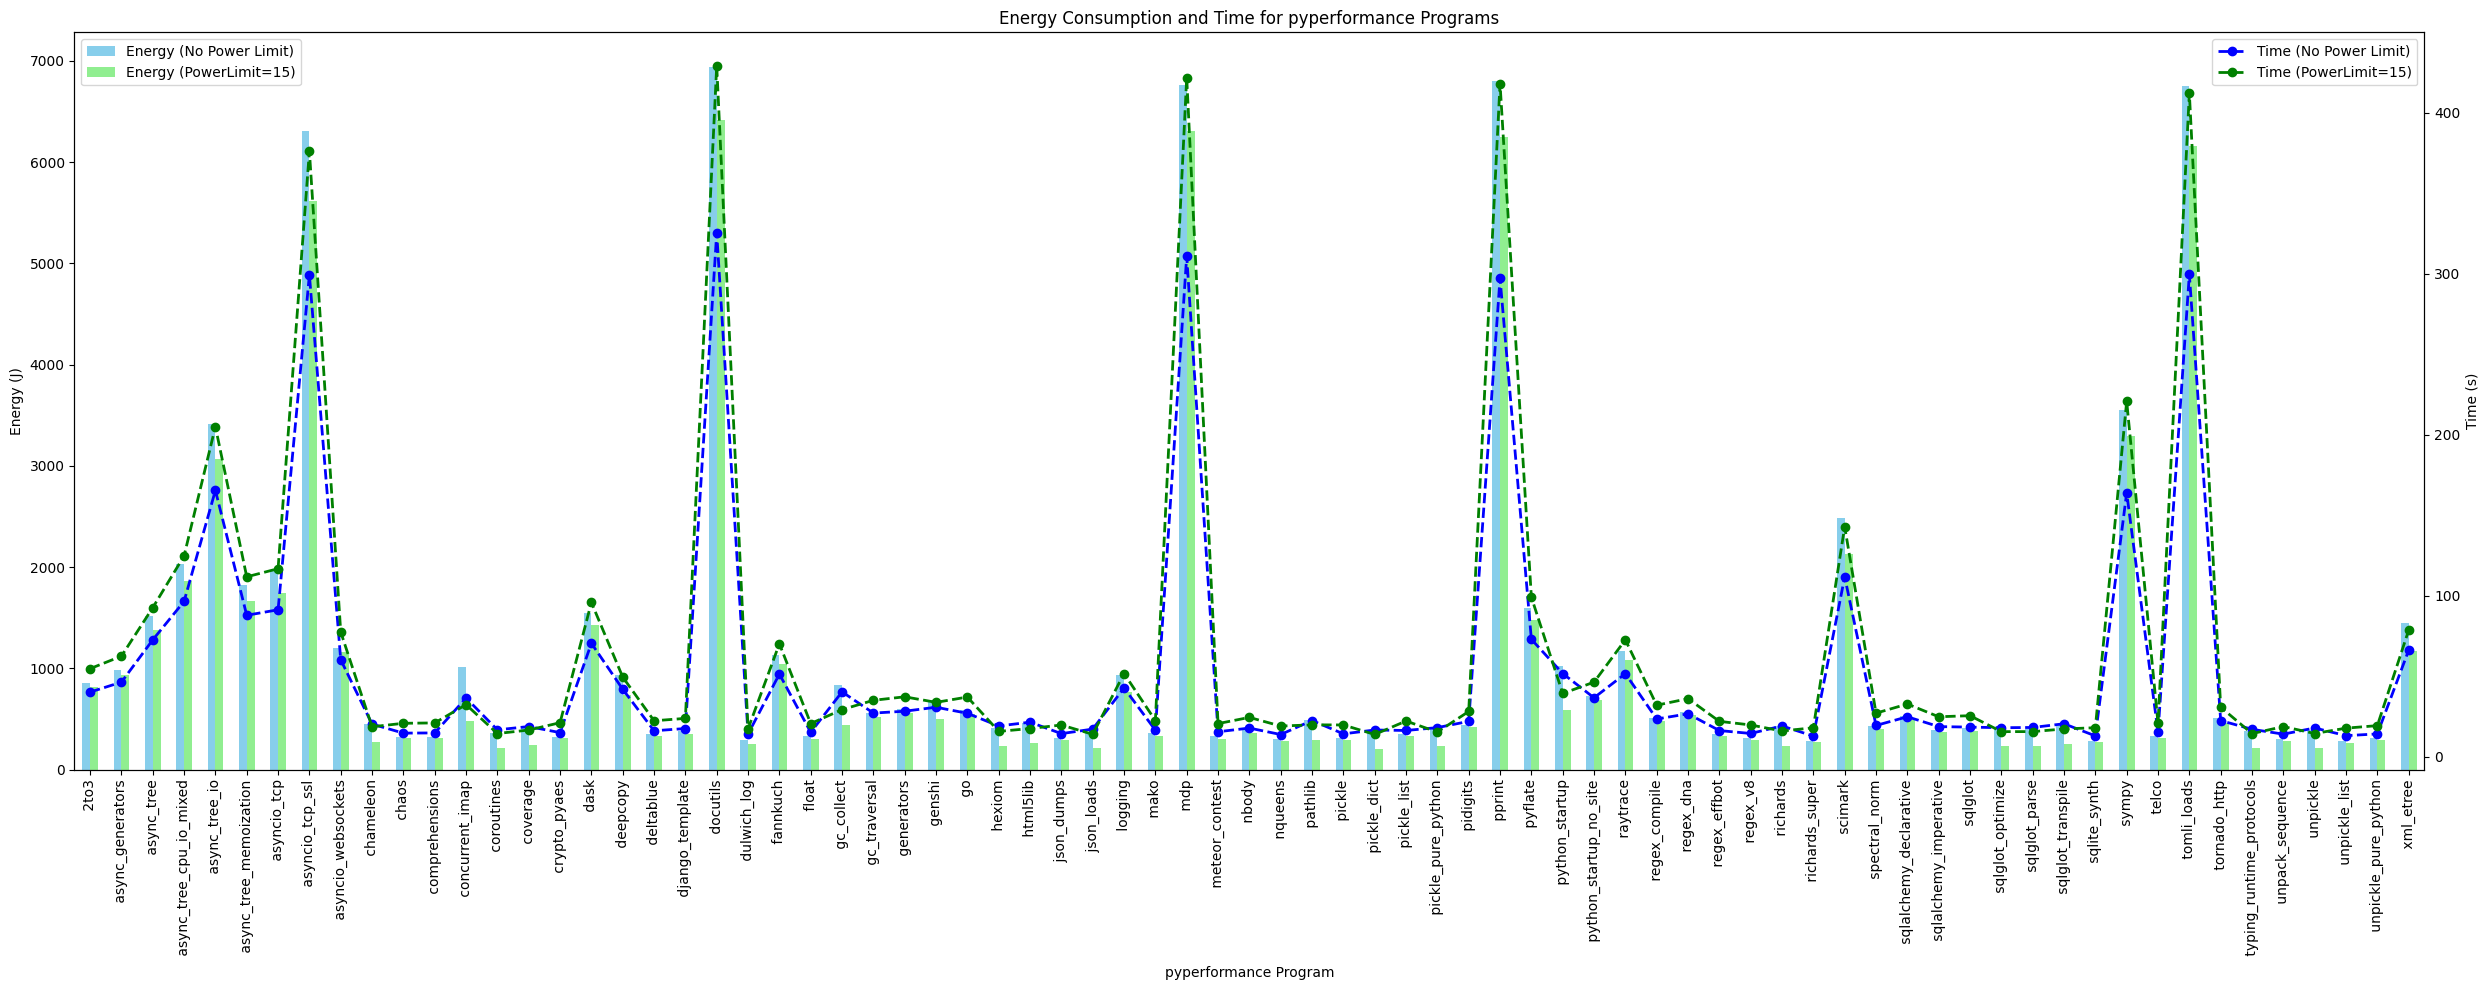

In [29]:
# Filtra os dados por Language
language = "Python"  # Pode ser "Haskell", "Java", ou "Python"
df_filtered = df_mean_values[df_mean_values["Language"] == language]

# Calcula a média de Energy (J) e Time (ms) para cada Program e PowerLimit
df_energy = df_filtered.groupby(['Program', 'PowerLimit'])['Energy (J)'].mean().unstack()
df_time = df_filtered.groupby(['Program', 'PowerLimit'])['Time (ms)'].mean().unstack()

# Cores ajustadas para Energy (J) e Time (ms)
energy_colors = ['skyblue', 'lightgreen']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'
time_colors = ['blue', 'green']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'

# Cria o gráfico de barras para Energy (J)
fig, ax1 = plt.subplots(figsize=(25, 10))
df_energy.plot(kind='bar', ax=ax1, color=energy_colors)

# Configurações do gráfico para Energy (J)
ax1.set_xlabel('pyperformance Program')
ax1.set_ylabel('Energy (J)')
ax1.set_title(f'Energy Consumption and Time for pyperformance Programs')
ax1.legend(['Energy (No Power Limit)', 'Energy (PowerLimit=15)'], loc='upper left')
ax1.tick_params(axis='x', rotation=90)

# Cria um segundo eixo y para Time (ms)
ax2 = ax1.twinx()
df_time.plot(kind='line', ax=ax2, marker='o', linewidth=2, linestyle='--', color=time_colors)

# Configurações do gráfico para Time (ms)
ax2.set_ylabel('Time (s)')
ax2.legend(['Time (No Power Limit)', 'Time (PowerLimit=15)'], loc='upper right')

plt.tight_layout()
plt.show()

#### Java

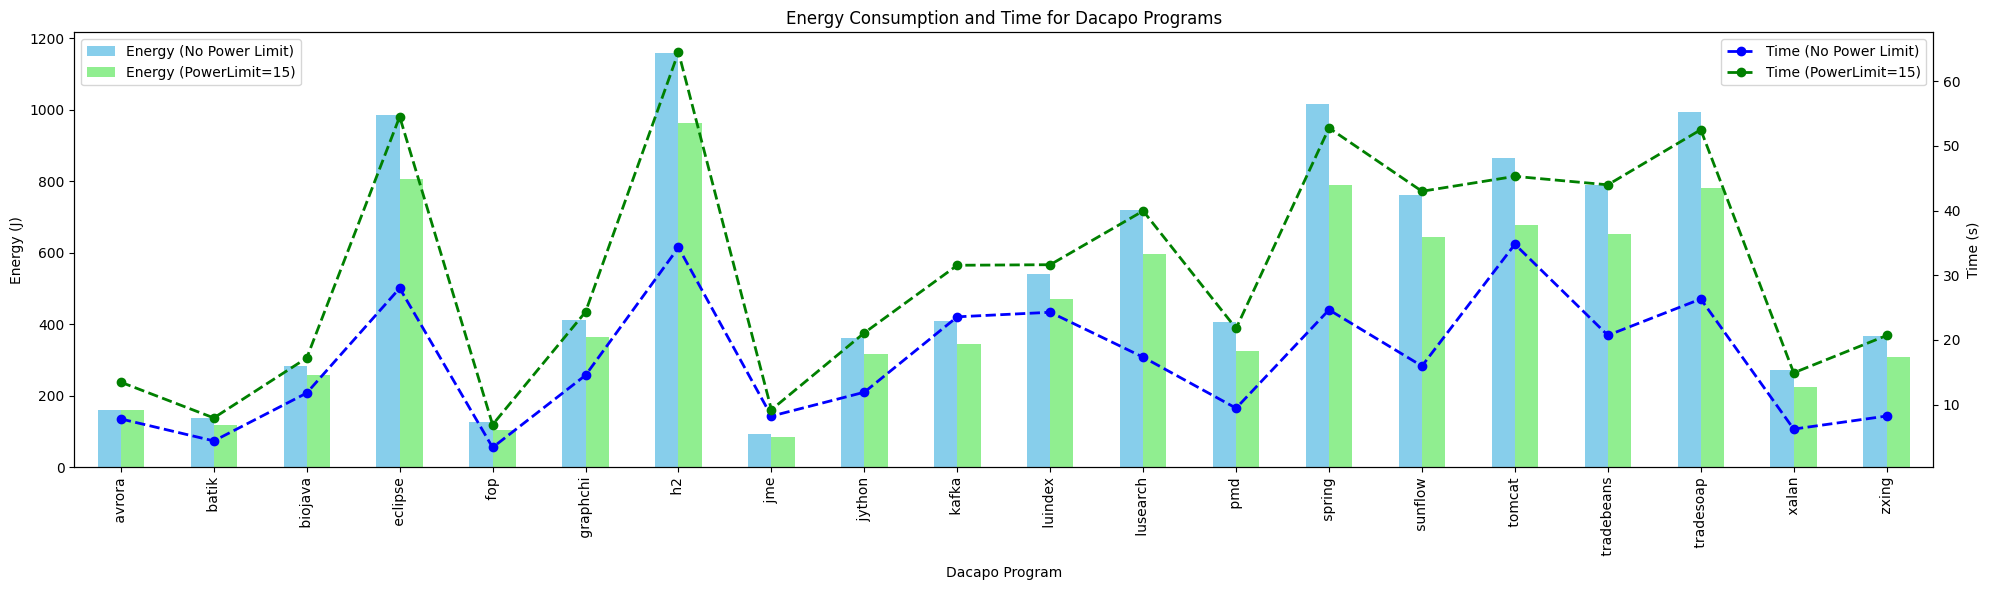

In [30]:
# Filtra os dados por Language
language = "Java"  # Pode ser "Haskell", "Java", ou "Python"
df_filtered = df_mean_values[df_mean_values["Language"] == language]

# Calcula a média de Energy (J) e Time (ms) para cada Program e PowerLimit
df_energy = df_filtered.groupby(['Program', 'PowerLimit'])['Energy (J)'].mean().unstack()
df_time = df_filtered.groupby(['Program', 'PowerLimit'])['Time (ms)'].mean().unstack()

# Cores ajustadas para Energy (J) e Time (ms)
energy_colors = ['skyblue', 'lightgreen']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'
time_colors = ['blue', 'green']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'

# Cria o gráfico de barras para Energy (J)
fig, ax1 = plt.subplots(figsize=(20, 6))
df_energy.plot(kind='bar', ax=ax1, color=energy_colors)

# Configurações do gráfico para Energy (J)
ax1.set_xlabel('Dacapo Program')
ax1.set_ylabel('Energy (J)')
ax1.set_title(f'Energy Consumption and Time for Dacapo Programs')
ax1.legend(['Energy (No Power Limit)', 'Energy (PowerLimit=15)'], loc='upper left')
ax1.tick_params(axis='x', rotation=90)  # Mantém o eixo x sem rotação

# Cria um segundo eixo y para Time (ms)
ax2 = ax1.twinx()
df_time.plot(kind='line', ax=ax2, marker='o', linewidth=2, linestyle='--', color=time_colors)

# Configurações do gráfico para Time (ms)
ax2.set_ylabel('Time (s)')
ax2.legend(['Time (No Power Limit)', 'Time (PowerLimit=15)'], loc='upper right')

plt.tight_layout()
plt.show()

#### Haskell

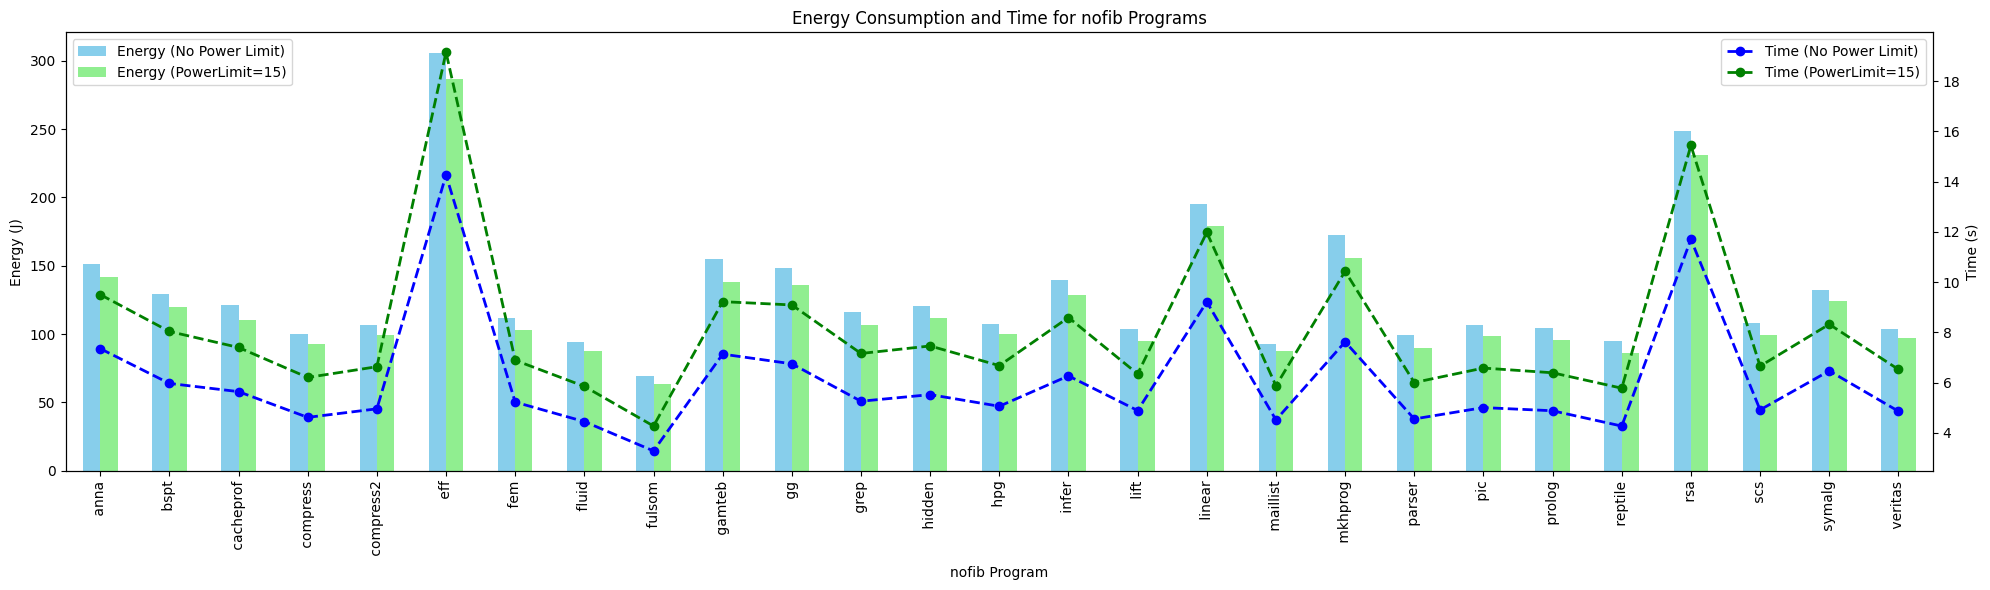

In [31]:
# Filtra os dados por Language
language = "Haskell"  # Pode ser "Haskell", "Java", ou "Python"
df_filtered = df_mean_values[df_mean_values["Language"] == language]

# Calcula a média de Energy (J) e Time (ms) para cada Program e PowerLimit
df_energy = df_filtered.groupby(['Program', 'PowerLimit'])['Energy (J)'].mean().unstack()
df_time = df_filtered.groupby(['Program', 'PowerLimit'])['Time (ms)'].mean().unstack()

# Cores ajustadas para Energy (J) e Time (ms)
energy_colors = ['skyblue', 'lightgreen']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'
time_colors = ['blue', 'green']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'

# Cria o gráfico de barras para Energy (J)
fig, ax1 = plt.subplots(figsize=(20, 6))
df_energy.plot(kind='bar', ax=ax1, color=energy_colors)

# Configurações do gráfico para Energy (J)
ax1.set_xlabel('nofib Program')
ax1.set_ylabel('Energy (J)')
ax1.set_title(f'Energy Consumption and Time for nofib Programs')
ax1.legend(['Energy (No Power Limit)', 'Energy (PowerLimit=15)'], loc='upper left')
ax1.tick_params(axis='x', rotation=90)  # Mantém o eixo x sem rotação

# Cria um segundo eixo y para Time (ms)
ax2 = ax1.twinx()
df_time.plot(kind='line', ax=ax2, marker='o', linewidth=2, linestyle='--', color=time_colors)

# Configurações do gráfico para Time (ms)
ax2.set_ylabel('Time (s)')
ax2.legend(['Time (No Power Limit)', 'Time (PowerLimit=15)'], loc='upper right')

plt.tight_layout()
plt.show()

#### All benchmarks

In [32]:
df_mean_values

,Language,Program,PowerLimit,Energy (J),Time (ms)
0,Haskell,anna,-1,151.416351,7.350143
1,Haskell,anna,15,142.024026,9.502143
2,Haskell,bspt,-1,129.296147,5.964429
3,Haskell,bspt,15,120.063402,8.032857
4,Haskell,cacheprof,-1,121.222595,5.637643
...,...,...,...,...,...
239,Python,unpickle_list,15,264.132952,17.808214
240,Python,unpickle_pure_python,-1,312.523111,14.233357
241,Python,unpickle_pure_python,15,287.609798,19.376714
242,Python,xml_etree,-1,1450.197170,66.218714


In [33]:
# Substitui os valores de Language pelos benchmarks desejados
df_mean_values['Language (updated)'] = df_mean_values['Language'].replace({'Python': 'pyperformance (Python)', 'Haskell': 'nofib (Haskell)', 'Java': 'dacapo (Java)'})
df_mean_values

,Language,Program,PowerLimit,Energy (J),Time (ms),Language (updated)
0,Haskell,anna,-1,151.416351,7.350143,nofib (Haskell)
1,Haskell,anna,15,142.024026,9.502143,nofib (Haskell)
2,Haskell,bspt,-1,129.296147,5.964429,nofib (Haskell)
3,Haskell,bspt,15,120.063402,8.032857,nofib (Haskell)
4,Haskell,cacheprof,-1,121.222595,5.637643,nofib (Haskell)
...,...,...,...,...,...,...
239,Python,unpickle_list,15,264.132952,17.808214,pyperformance (Python)
240,Python,unpickle_pure_python,-1,312.523111,14.233357,pyperformance (Python)
241,Python,unpickle_pure_python,15,287.609798,19.376714,pyperformance (Python)
242,Python,xml_etree,-1,1450.197170,66.218714,pyperformance (Python)


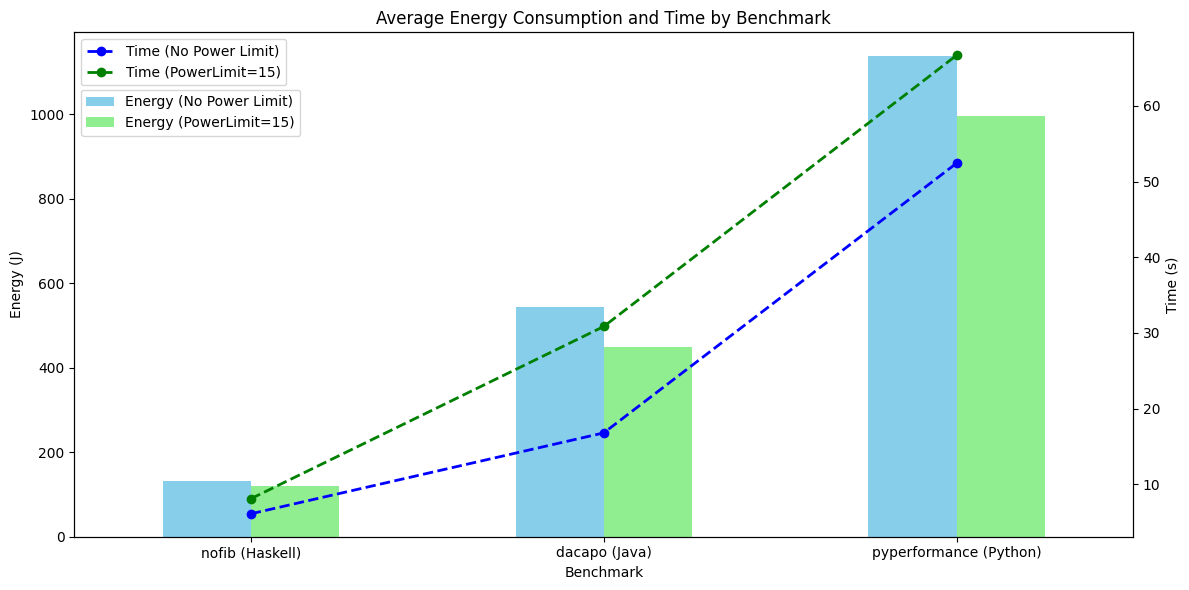

In [34]:
# Calcula a média de Energy (J) e Time (ms) para cada Language e PowerLimit
df_energy = df_mean_values.groupby(['Language (updated)', 'PowerLimit'])['Energy (J)'].mean().unstack()
df_time = df_mean_values.groupby(['Language (updated)', 'PowerLimit'])['Time (ms)'].mean().unstack()

# Reordena as colunas na ordem desejada
desired_order = ['nofib (Haskell)', 'dacapo (Java)', 'pyperformance (Python)']
df_energy = df_energy.reindex(desired_order)
df_time = df_time.reindex(desired_order)

# Cores para os gráficos
energy_colors = ['skyblue', 'lightgreen']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'
time_colors = ['blue', 'green']  # Azul para 'No Power Limit', verde para 'PowerLimit=15'

# Cria o gráfico de barras para Energy (J)
fig, ax1 = plt.subplots(figsize=(12, 6))
df_energy.plot(kind='bar', ax=ax1, color=energy_colors)

# Configurações do gráfico para Energy (J)
ax1.set_xlabel('Benchmark')
ax1.set_ylabel('Energy (J)')
ax1.set_title('Average Energy Consumption and Time by Benchmark')
ax1.legend(['Energy (No Power Limit)', 'Energy (PowerLimit=15)'], bbox_to_anchor=(0.22, 0.90), loc='upper right')
ax1.tick_params(axis='x', rotation=0)  # Mantém o eixo x sem rotação

# Cria um segundo eixo y para Time (ms)
ax2 = ax1.twinx()
df_time.plot(kind='line', ax=ax2, marker='o', linewidth=2, linestyle='--', color=time_colors)

# Configurações do gráfico para Time (ms)
ax2.set_ylabel('Time (s)')
ax2.legend(['Time (No Power Limit)', 'Time (PowerLimit=15)'], loc='upper left')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

plt.show()